# 1. Cargar los datos
Carga ambos archivos CSV en dos DataFrames de pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [9]:
hospitaldf = pd.read_csv('/content/examen/hospital_data.csv')
studentsdf = pd.read_csv('/content/examen/students_data.csv')

#  Exploración inicial


In [10]:
print('Hospital DataFrame:')
print(hospitaldf.head())
print(hospitaldf.describe(include='all'))



Hospital DataFrame:
   Age  BMI  Blood_Pressure  Cholesterol Risk_Level
0   45   25             130          200       High
1   30   22             120          180        Low
2   60   28             140          220     Medium
3   35   24             125          190        Low
4   50   26             135          210       High
              Age        BMI  Blood_Pressure  Cholesterol Risk_Level
count    5.000000   5.000000        5.000000     5.000000          5
unique        NaN        NaN             NaN          NaN          3
top           NaN        NaN             NaN          NaN       High
freq          NaN        NaN             NaN          NaN          2
mean    44.000000  25.000000      130.000000   200.000000        NaN
std     11.937336   2.236068        7.905694    15.811388        NaN
min     30.000000  22.000000      120.000000   180.000000        NaN
25%     35.000000  24.000000      125.000000   190.000000        NaN
50%     45.000000  25.000000      130.000000   

In [11]:
print('\nStudents DataFrame:')
print(studentsdf.head())
print(studentsdf.describe(include='all'))


Students DataFrame:
   Study_Hours  Attendance  GPA Result
0            5          80  2.5   Fail
1           10          95  3.8   Pass
2            3          60  1.9   Fail
3            8          90  3.5   Pass
4            6          85  2.8   Pass
        Study_Hours  Attendance       GPA Result
count      5.000000    5.000000  5.000000      5
unique          NaN         NaN       NaN      2
top             NaN         NaN       NaN   Pass
freq            NaN         NaN       NaN      3
mean       6.400000   82.000000  2.900000    NaN
std        2.701851   13.509256  0.764853    NaN
min        3.000000   60.000000  1.900000    NaN
25%        5.000000   80.000000  2.500000    NaN
50%        6.000000   85.000000  2.800000    NaN
75%        8.000000   90.000000  3.500000    NaN
max       10.000000   95.000000  3.800000    NaN


 Análisis de la variable objetivo


Risk_Level
High      2
Low       2
Medium    1
Name: count, dtype: int64


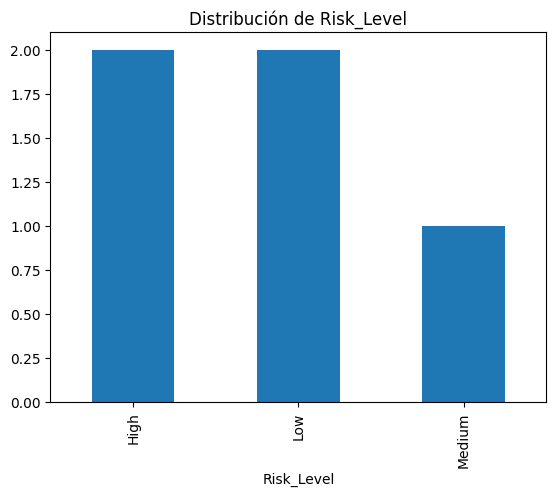

Result
Pass    3
Fail    2
Name: count, dtype: int64


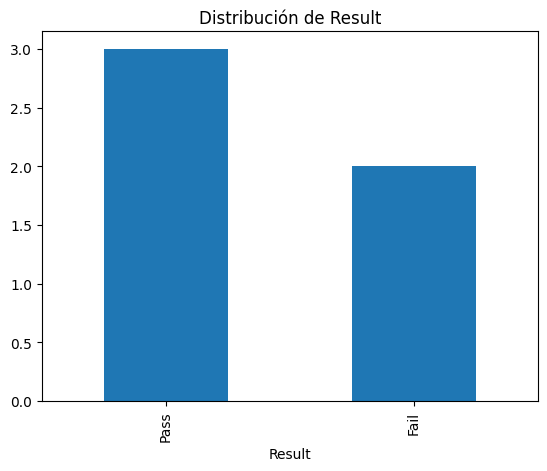

In [3]:
print(hospitaldf['Risk_Level'].value_counts())
hospitaldf['Risk_Level'].value_counts().plot(kind='bar', title='Distribución de Risk_Level')
plt.show()

print(studentsdf['Result'].value_counts())
studentsdf['Result'].value_counts().plot(kind='bar', title='Distribución de Result')
plt.show()

# Preprocesamiento


In [4]:

hospital_data = hospitaldf.copy()
student_data = studentsdf.copy()


le = LabelEncoder()
hospital_data['Risk_Level'] = le.fit_transform(hospital_data['Risk_Level'])
student_data['Result'] = le.fit_transform(student_data['Result'])

scaler = StandardScaler()
hospital_X = scaler.fit_transform(hospital_data.drop('Risk_Level', axis=1))
hospital_y = hospital_data['Risk_Level']

student_X = scaler.fit_transform(student_data.drop('Result', axis=1))
student_y = student_data['Result']

#  División de datos


In [5]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(hospital_X, hospital_y, test_size=0.2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(student_X, student_y, test_size=0.2, random_state=42)

#  Entrenamiento de modelos


In [8]:

log_h = LogisticRegression().fit(X_train_h, y_train_h)
tree_h = DecisionTreeClassifier().fit(X_train_h, y_train_h)
log_s = LogisticRegression().fit(X_train_s, y_train_s)
tree_s = DecisionTreeClassifier().fit(X_train_s, y_train_s)

#  Evaluación de modelos


In [14]:
from sklearn.metrics import classification_report, confusion_matrix


def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f" Evaluación del modelo: {nombre}")
    print(" Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("="*60)


evaluar_modelo("Regresión Logística - Hospital", log_h, X_test_h, y_test_h)
evaluar_modelo("Árbol de Decisión - Hospital", tree_h, X_test_h, y_test_h)


evaluar_modelo("Regresión Logística - Students", log_s, X_test_s, y_test_s)
evaluar_modelo("Árbol de Decisión - Students", tree_s, X_test_s, y_test_s)


 Evaluación del modelo: Regresión Logística - Hospital
 Matriz de Confusión:
[[1]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

 Evaluación del modelo: Árbol de Decisión - Hospital
 Matriz de Confusión:
[[1]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

 Evaluación del modelo: Regresión Logística - Students
 Matriz de Confusión:
[[1]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th